# EVI Visualization (2016)

Visualize clipped EVI raster for Brahmanbaria (2016) using categorical classes.
Reads `map/2016/brahmanbaria_evi_<yyyymmdd>.tif`.


In [22]:
import sys
from pathlib import Path

# notebooks/ → project root
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

import src.geo_env   # MUST come immediately after path fix

In [23]:

import re
from pathlib import Path
import numpy as np
import rasterio
from rasterio.enums import Resampling
from rasterio.warp import transform_bounds
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import geopandas as gpd


In [24]:

# Resolve project root (assumes this notebook lives in <project>/notebooks)
base = Path.cwd()
if (base / "map").exists():
    project_root = base
elif (base.parent / "map").exists():
    project_root = base.parent
else:
    project_root = base

year = 2016
map_dir = project_root / "map" / str(year)
scale_factor = 4  # 1 = full res; larger numbers downsample more

# EVI classes
bounds = [-0.5, 0, 0.1, 0.25, 0.45, 0.65, 1.5]
hex_colors = ["#2166AC", "#D2B48C", "#FEE08B", "#91CF60", "#1A9850", "#00441B"]
labels = [
    "< 0 (Water)",
    "0–0.1 (Bare/Urban)",
    "0.1–0.25 (Sparse/Stressed)",
    "0.25–0.45 (Moderate)",
    "0.45–0.65 (Dense)",
    "> 0.65 (Very Dense)",
]

cmap = ListedColormap(hex_colors)
norm = BoundaryNorm(bounds, cmap.N)
ticks = [(-0.5 + 0)/2, (0 + 0.1)/2, (0.1 + 0.25)/2, (0.25 + 0.45)/2, (0.45 + 0.65)/2, (0.65 + 1.5)/2]


In [25]:
# # Locate EVI raster
# candidates = sorted(map_dir.glob("brahmanbaria_evi_*.tif"))
# if not candidates:
#     raise FileNotFoundError(f"No EVI raster found in {map_dir}")
# if len(candidates) > 1:
#     print("Multiple EVI files found, using first:", candidates[0])
# path = candidates[0]

# m = re.search(r"(\d{8})", path.name)
# date_str = m.group(1) if m else "yyyyMMdd"

# with rasterio.open(path) as src:
#     out_height = max(1, src.height // scale_factor)
#     out_width = max(1, src.width // scale_factor)
#     evi = src.read(1, out_shape=(out_height, out_width), resampling=Resampling.average)
#     evi = np.ma.masked_invalid(evi)
#     lon_min, lat_min, lon_max, lat_max = transform_bounds(src.crs, "EPSG:4326", *src.bounds)

# pad_frac = 0.05
# pad_lon = (lon_max - lon_min) * pad_frac
# pad_lat = (lat_max - lat_min) * pad_frac
# extent = [lon_min - pad_lon, lon_max + pad_lon, lat_min - pad_lat, lat_max + pad_lat]

# # Prepare output path
# out_dir = project_root / "data" / "processed" / str(year)
# out_dir.mkdir(parents=True, exist_ok=True)
# fig_path = out_dir / f"evi_brahmanbaria_{date_str}.png"


In [26]:
# # --------------------------------------------------
# # Compute padded axes limits (NOT raster extent)
# # --------------------------------------------------
# pad_frac = 0.02  # 2% padding around the map

# dx = (extent[1] - extent[0]) * pad_frac
# dy = (extent[3] - extent[2]) * pad_frac

# xlim_pad = (extent[0] - dx, extent[1] + dx)
# ylim_pad = (extent[2] - dy, extent[3] + dy)

# # --------------------------------------------------
# # Plot
# # --------------------------------------------------
# fig, ax = plt.subplots(figsize=(10, 10))

# # IMPORTANT: use ORIGINAL extent here
# im = ax.imshow(
#         evi,
#         cmap=cmap,
#         norm=norm,
#         extent=extent,
#         origin="upper"
# )

# # Apply padded limits → creates gap between map & frame
# ax.set_xlim(*xlim_pad)
# ax.set_ylim(*ylim_pad)

# ax.set_title(
#         f"EVI Enhanced Vegetation Index ({date_str[:4]}-{date_str[4:6]}-{date_str[6:]}) - Brahmanbaria",
#         pad=14
# )
# ax.set_xlabel("Longitude (°)")
# ax.set_ylabel("Latitude (°)")

# # --------------------------------------------------
# # Colorbar
# # --------------------------------------------------
# cbar = fig.colorbar(
#         im,
#         ax=ax,
#         boundaries=bounds,
#         ticks=ticks,
#         fraction=0.046,
#         pad=0.04
# )
# cbar.ax.set_yticklabels(labels)
# cbar.ax.set_title("EVI (Category)", pad=8, fontsize=10)

# # --------------------------------------------------
# # North arrow
# # --------------------------------------------------
# ax.annotate(
#         "N",
#         xy=(0.97, 0.18),
#         xytext=(0.97, 0.08),
#         xycoords="axes fraction",
#         ha="center",
#         va="center",
#         fontsize=11,
#         arrowprops=dict(facecolor="black", width=3, headwidth=10)
# )

# # --------------------------------------------------
# # Scale bar (10 km)
# # --------------------------------------------------
# scale_len_km = 10
# mid_lat = (ylim_pad[0] + ylim_pad[1]) / 2
# km_per_deg_lon = 111.32 * np.cos(np.deg2rad(mid_lat))
# bar_len_deg = scale_len_km / km_per_deg_lon

# x0 = xlim_pad[0] + 0.08 * (xlim_pad[1] - xlim_pad[0])
# y0 = ylim_pad[0] + 0.06 * (ylim_pad[1] - ylim_pad[0])

# ax.plot([x0, x0 + bar_len_deg], [y0, y0], color="k", lw=3)
# ax.text(
#         x0 + bar_len_deg / 2,
#         y0 + (ylim_pad[1] - ylim_pad[0]) * 0.01,
#         f"{scale_len_km} km",
#         ha="center",
#         va="bottom",
#         fontsize=9
# )

# # --------------------------------------------------
# # Layout & save
# # --------------------------------------------------
# fig.subplots_adjust(left=0.08, right=0.82, top=0.93, bottom=0.08)

# plt.savefig(fig_path, dpi=300)
# print(f"Saved figure to {fig_path}")
# plt.show()


In [27]:
# --------------------------------------------------
# Read EVI raster with correct resampling geometry
# --------------------------------------------------
candidates = sorted(map_dir.glob("brahmanbaria_evi_*.tif"))
if not candidates:
    raise FileNotFoundError(f"No EVI raster found in {map_dir}")

path = candidates[0]

m = re.search(r"(\d{8})", path.name)
date_str = m.group(1) if m else "yyyyMMdd"

with rasterio.open(path) as src:
    scale = scale_factor

    out_height = max(1, src.height // scale)
    out_width  = max(1, src.width  // scale)

    # ---- resampled raster ----
    evi = src.read(
        1,
        out_shape=(out_height, out_width),
        resampling=Resampling.average
    )
    evi = np.ma.masked_invalid(evi)

    # ---- recompute transform (CRITICAL) ----
    transform = src.transform * src.transform.scale(
        src.width / out_width,
        src.height / out_height
    )

    raster_crs = src.crs

# --------------------------------------------------
# Correct extent from RESAMPLED transform
# --------------------------------------------------
xmin = transform.c
xmax = transform.c + transform.a * out_width
ymax = transform.f
ymin = transform.f + transform.e * out_height

# Pad extent
pad_frac = 0.05
dx = (xmax - xmin) * pad_frac
dy = (ymax - ymin) * pad_frac

extent = [
    xmin - dx,
    xmax + dx,
    ymin - dy,
    ymax + dy
]

# --------------------------------------------------
# Read upazilas → raster CRS
# --------------------------------------------------
upazila_path = project_root / "map" / "brahmanbaria_upazilas_gpkg.gpkg"
gdf_upazila = gpd.read_file(upazila_path).to_crs(raster_crs)

# Output
out_dir = project_root / "data" / "processed" / str(year)
out_dir.mkdir(parents=True, exist_ok=True)
fig_path = out_dir / f"evi_brahmanbaria_{date_str}.png"


Saved figure to f:\brahmanbariavegetation\data\processed\2016\evi_brahmanbaria_20161113.png


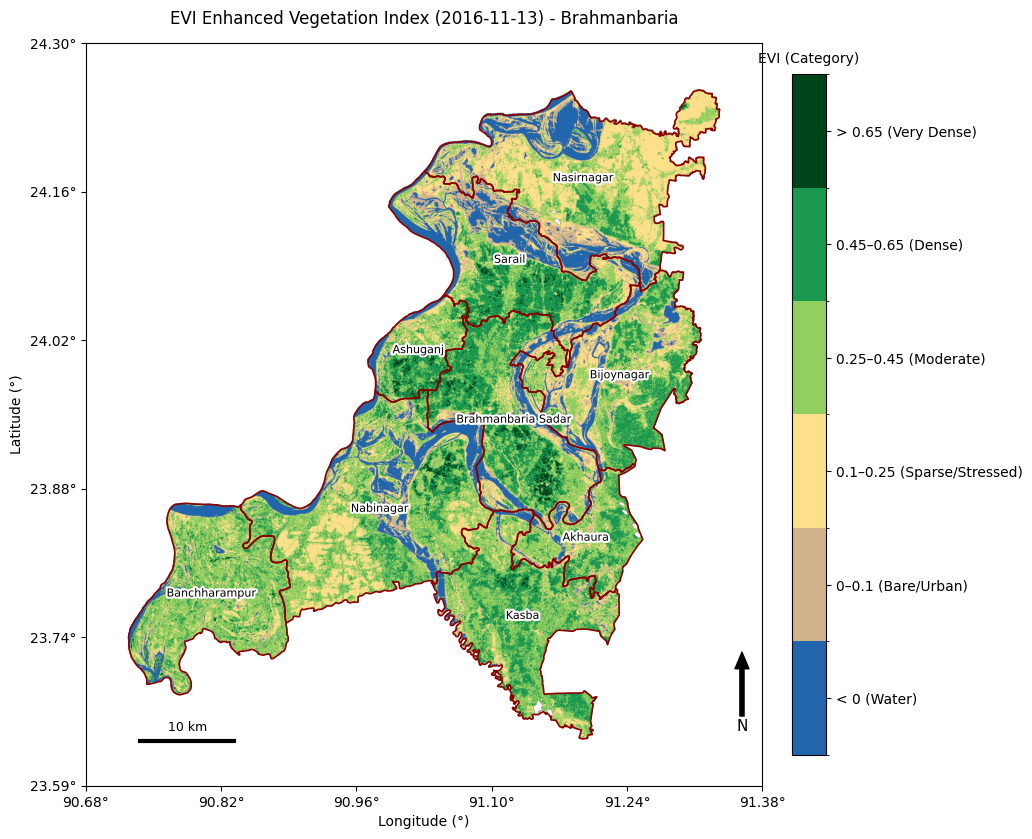

In [28]:
from pyproj import Transformer
import matplotlib.patheffects as pe

# --------------------------------------------------
# Axes padding (meters)
# --------------------------------------------------
pad_frac = 0.02
dx = (extent[1] - extent[0]) * pad_frac
dy = (extent[3] - extent[2]) * pad_frac

xlim_pad = (extent[0] - dx, extent[1] + dx)
ylim_pad = (extent[2] - dy, extent[3] + dy)

# --------------------------------------------------
# Plot
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# im = ax.imshow(
#     evi,
#     cmap=cmap,
#     norm=norm,
#     extent=extent,
#     origin="lower"
# )
im = ax.imshow(
    evi,
    cmap=cmap,
    norm=norm,
    extent=[xmin, xmax, ymin, ymax],  # bottom, top ordering
    origin="upper"                    # ← THIS is correct
)


ax.set_xlim(*xlim_pad)
ax.set_ylim(*ylim_pad)

# --------------------------------------------------
# Upazila boundaries (brick red)
# --------------------------------------------------
gdf_upazila.boundary.plot(
    ax=ax,
    edgecolor="#8B0000",
    linewidth=1.2,
    zorder=5
)

# --------------------------------------------------
# Upazila names with halo (ADM3_EN)
# --------------------------------------------------
for _, row in gdf_upazila.iterrows():
    if row.geometry is None or row.geometry.is_empty:
        continue

    x, y = row.geometry.centroid.coords[0]
    txt = ax.text(
        x, y,
        row["ADM3_EN"],
        fontsize=8,
        ha="center",
        va="center",
        color="black",
        zorder=6
    )
    txt.set_path_effects([
        pe.Stroke(linewidth=3, foreground="white"),
        pe.Normal()
    ])

# --------------------------------------------------
# Lat / Lon ticks (decimal degrees)
# --------------------------------------------------
to_wgs84 = Transformer.from_crs("EPSG:32646", "EPSG:4326", always_xy=True)

n_ticks = 6

x_ticks = np.linspace(*xlim_pad, n_ticks)
lon_labels = [to_wgs84.transform(x, ylim_pad[0])[0] for x in x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{lon:.2f}°" for lon in lon_labels])

y_ticks = np.linspace(*ylim_pad, n_ticks)
lat_labels = [to_wgs84.transform(xlim_pad[0], y)[1] for y in y_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{lat:.2f}°" for lat in lat_labels])

ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

# --------------------------------------------------
# Title
# --------------------------------------------------
ax.set_title(
    f"EVI Enhanced Vegetation Index ({date_str[:4]}-{date_str[4:6]}-{date_str[6:]}) - Brahmanbaria",
    pad=14
)

# --------------------------------------------------
# Colorbar
# --------------------------------------------------
cbar = fig.colorbar(
    im,
    ax=ax,
    boundaries=bounds,
    ticks=ticks,
    fraction=0.046,
    pad=0.04
)
cbar.ax.set_yticklabels(labels)
cbar.ax.set_title("EVI (Category)", pad=8, fontsize=10)

# --------------------------------------------------
# North arrow
# --------------------------------------------------
ax.annotate(
    "N",
    xy=(0.97, 0.18),
    xytext=(0.97, 0.08),
    xycoords="axes fraction",
    ha="center",
    va="center",
    fontsize=11,
    arrowprops=dict(facecolor="black", width=3, headwidth=10)
)

# --------------------------------------------------
# Scale bar (10 km)
# --------------------------------------------------
scale_len_km = 10
bar_len_m = scale_len_km * 1000

x0 = xlim_pad[0] + 0.08 * (xlim_pad[1] - xlim_pad[0])
y0 = ylim_pad[0] + 0.06 * (ylim_pad[1] - ylim_pad[0])

ax.plot([x0, x0 + bar_len_m], [y0, y0], color="k", lw=3)
ax.text(
    x0 + bar_len_m / 2,
    y0 + 0.01 * (ylim_pad[1] - ylim_pad[0]),
    f"{scale_len_km} km",
    ha="center",
    va="bottom",
    fontsize=9
)

# --------------------------------------------------
# Save
# --------------------------------------------------
fig.subplots_adjust(left=0.08, right=0.82, top=0.93, bottom=0.08)
plt.savefig(fig_path, dpi=300)
print(f"Saved figure to {fig_path}")
plt.show()
